In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

## About Data

In [2]:
df= pd.read_csv('ResumeDataSet.csv')

In [3]:
df.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df.isnull().sum() #checking for Null values

Category    0
Resume      0
dtype: int64

In [8]:
df.describe(include=['O'])

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [9]:
categories = df['Category'].value_counts()
categories

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

## Data Processing

In [10]:
df1= df.copy()
df1['Cleaned_Text']= ""
df1.head()

,Category,Resume,Cleaned_Text
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [11]:
df1.isnull().sum()

Category        0
Resume          0
Cleaned_Text    0
dtype: int64

# Pre Processing

In [12]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [13]:
df1['Cleaned_Text'] = df1.Resume.apply(lambda x: cleanResume(x))

In [14]:
df1

,Category,Resume,Cleaned_Text
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [15]:
df1['Cleaned_Text'] = df1['Cleaned_Text'].apply(lambda x:x.lower()) #Converting data into lower case
for i in range(len(df)):
    lw=[]
    for j in df1['Cleaned_Text'][i].split():
        if len(j)>=3:                  
            lw.append(j)
    df1['Cleaned_Text'][i]=" ".join(lw)

In [16]:
# ps = list(";?.:!,")
# df1['Cleaned_Text'] = df1['Cleaned_Text']

# for p in ps:   
#     df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace(p, '')

In [17]:
#Removing '\n' and '\t', extra spaces, quoting text
df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace("    ", " ")
df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace('"', '')
df1['Cleaned_Text'] = df1['Cleaned_Text'].apply(lambda x: x.replace('\t', ' '))
df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace("'s", "")
df1['Cleaned_Text'] = df1['Cleaned_Text'].apply(lambda x: x.replace('\n', ' '))

## Lemmatization

In [18]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRASHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PRASHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PRASHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
wl = WordNetLemmatizer()
nr = len(df1)
lis = []
for r in range(0, nr):
    ll = []
    t = df1.loc[r]['Cleaned_Text']
    tw = str(t).split(" ")
    for w in tw:
        ll.append(wl.lemmatize(w, pos="v"))
    lt = " ".join(ll)
    lis.append(lt)

In [20]:
wl

<WordNetLemmatizer>

In [21]:
df1['Cleaned_Text'] = lis

## Removing Stop-words

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRASHANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
sw = list(stopwords.words('english'))
for s in sw:
    rs = r"\b" + s + r"\b"
    df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace(rs, '')

C:\Users\PRASHANT\AppData\Local\Temp\ipykernel_17508\4131384402.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Cleaned_Text'] = df1['Cleaned_Text'].str.replace(rs, '')


# Data Preparation for Training and Testing


In [24]:
df1['Category'] = LabelEncoder().fit_transform(df1['Category'])

## Converting Resumes content into Vector form¶

In [25]:
cv = CountVectorizer(max_features = 200)
X = cv.fit_transform(df1['Cleaned_Text']).toarray()
y = df1['Category']

# Train-Test split 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [27]:
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X_train, y_train)
# yp = clf.predict(X_test)
# acc = accuracy_score(y_test, yp)
# print("accuracy is: ",acc)

In [28]:
y_train=to_categorical(y_train, num_classes = 25, dtype='float32')
y_test=to_categorical(y_test, num_classes = 25, dtype='float32')

In [29]:
from keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding 
from keras.layers import Dense, Embedding, GRU, LSTM, Dropout, Bidirectional
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D

# 1D CNN model

In [30]:
model = Sequential()
model.add(Embedding(input_dim=232337, output_dim=100, input_length=X_train.shape[1]))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          23233700  
                                                                 
 conv1d (Conv1D)             (None, 198, 128)          38528     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 66, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 66, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 64, 128)           49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                         

In [36]:
history = model.fit(X_train, y_train, batch_size = 64, epochs=150, validation_data = (X_test,y_test), verbose=1)

Epoch 1/150
11/11 [==============================] - 3s 275ms/step - loss: 0.0067 - accuracy: 0.9881 - val_loss: 0.0208 - val_accuracy: 0.9585
Epoch 2/150
11/11 [==============================] - 3s 281ms/step - loss: 0.0063 - accuracy: 0.9851 - val_loss: 0.0194 - val_accuracy: 0.9585
Epoch 3/150
11/11 [==============================] - 3s 272ms/step - loss: 0.0068 - accuracy: 0.9807 - val_loss: 0.0190 - val_accuracy: 0.9585
Epoch 4/150
11/11 [==============================] - 3s 282ms/step - loss: 0.0087 - accuracy: 0.9777 - val_loss: 0.0174 - val_accuracy: 0.9585
Epoch 5/150
11/11 [==============================] - 3s 282ms/step - loss: 0.0065 - accuracy: 0.9911 - val_loss: 0.0188 - val_accuracy: 0.9585
Epoch 6/150
11/11 [==============================] - 3s 272ms/step - loss: 0.0091 - accuracy: 0.9658 - val_loss: 0.0171 - val_accuracy: 0.9585
Epoch 7/150
11/11 [==============================] - 3s 269ms/step - loss: 0.0105 - accuracy: 0.9777 - val_loss: 0.0138 - val_accuracy: 0.9585

Epoch 58/150
11/11 [==============================] - 3s 298ms/step - loss: 0.0059 - accuracy: 0.9851 - val_loss: 0.0172 - val_accuracy: 0.9585
Epoch 59/150
11/11 [==============================] - 3s 318ms/step - loss: 0.0041 - accuracy: 0.9955 - val_loss: 0.0182 - val_accuracy: 0.9585
Epoch 60/150
11/11 [==============================] - 3s 292ms/step - loss: 0.0057 - accuracy: 0.9822 - val_loss: 0.0188 - val_accuracy: 0.9585
Epoch 61/150
11/11 [==============================] - 3s 297ms/step - loss: 0.0051 - accuracy: 0.9896 - val_loss: 0.0229 - val_accuracy: 0.9585
Epoch 62/150
11/11 [==============================] - 3s 270ms/step - loss: 0.0044 - accuracy: 0.9881 - val_loss: 0.0219 - val_accuracy: 0.9689
Epoch 63/150
11/11 [==============================] - 3s 277ms/step - loss: 0.0058 - accuracy: 0.9896 - val_loss: 0.0192 - val_accuracy: 0.9689
Epoch 64/150
11/11 [==============================] - 3s 281ms/step - loss: 0.0045 - accuracy: 0.9911 - val_loss: 0.0207 - val_accuracy:

Epoch 115/150
11/11 [==============================] - 3s 294ms/step - loss: 0.0048 - accuracy: 0.9881 - val_loss: 0.0214 - val_accuracy: 0.9689
Epoch 116/150
11/11 [==============================] - 3s 279ms/step - loss: 0.0040 - accuracy: 0.9926 - val_loss: 0.0216 - val_accuracy: 0.9585
Epoch 117/150
11/11 [==============================] - 3s 266ms/step - loss: 0.0032 - accuracy: 0.9911 - val_loss: 0.0244 - val_accuracy: 0.9585
Epoch 118/150
11/11 [==============================] - 3s 274ms/step - loss: 0.0040 - accuracy: 0.9896 - val_loss: 0.0247 - val_accuracy: 0.9585
Epoch 119/150
11/11 [==============================] - 3s 271ms/step - loss: 0.0032 - accuracy: 0.9955 - val_loss: 0.0208 - val_accuracy: 0.9585
Epoch 120/150
11/11 [==============================] - 3s 269ms/step - loss: 0.0046 - accuracy: 0.9896 - val_loss: 0.0203 - val_accuracy: 0.9689
Epoch 121/150
11/11 [==============================] - 3s 266ms/step - loss: 0.0044 - accuracy: 0.9866 - val_loss: 0.0227 - val_ac

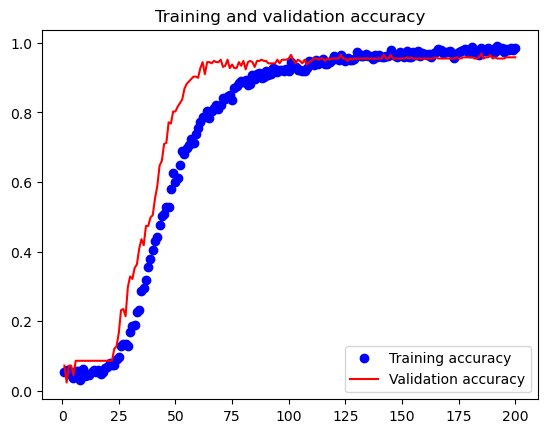

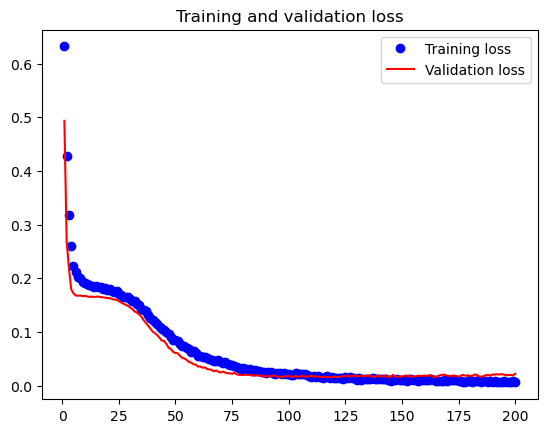

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
a= model.evaluate(X_test,y_test)
print("accuracy is: ",a[1])

10/10 [==============================] - 0s 11ms/step - loss: 0.0222 - accuracy: 0.9585
accuracy is:  0.9584774971008301


In [35]:
model.save('resume.h5')